<a href="https://colab.research.google.com/github/sidharth-ds/e-commerce-Customer-Segmentation/blob/main/project_grouping_products_1st_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
df = pd.read_csv("/content/drive/MyDrive/customer segmentation data.csv", encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
df = df.astype(str) 

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df = df.dropna(subset=['Description'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

### Removing punctuation (.!<>{}’,”(/)-) and Numbers:

In [10]:
df['Descsription_processed'] = df['Description'].str.replace("[^a-zA-Z]", " ")   # ^ means not symbol
df['Descsription_processed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: Descsription_processed, Length: 541909, dtype: object

### Replacing short words:

In [11]:
df['Descsription_processed'] = df['Descsription_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['Descsription_processed']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Descsription_processed, Length: 541909, dtype: object

### LowerCase character:

In [12]:
df['Descsription_processed'] = [review.lower() for review in df['Descsription_processed']]
df['Descsription_processed']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Descsription_processed, Length: 541909, dtype: object

### Remove stop words:

In [13]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = []

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['Descsription_processed'] = [remove_stopwords(r) for r in df['Descsription_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Word tokenise + POS Tagging + Lemmatization

In [14]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# function for Converting the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    #tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            # if tag == wordnet.NOUN:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)


df['Descsription_processed'] = df['Descsription_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
df['Descsription_processed']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Descsription_processed, Length: 541909, dtype: object

### Dropping the duplicates:

In [16]:
df2 = df['Descsription_processed'].drop_duplicates()
df2 = pd.DataFrame(df2)
df2

,Descsription_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


### plotting most frequent words:

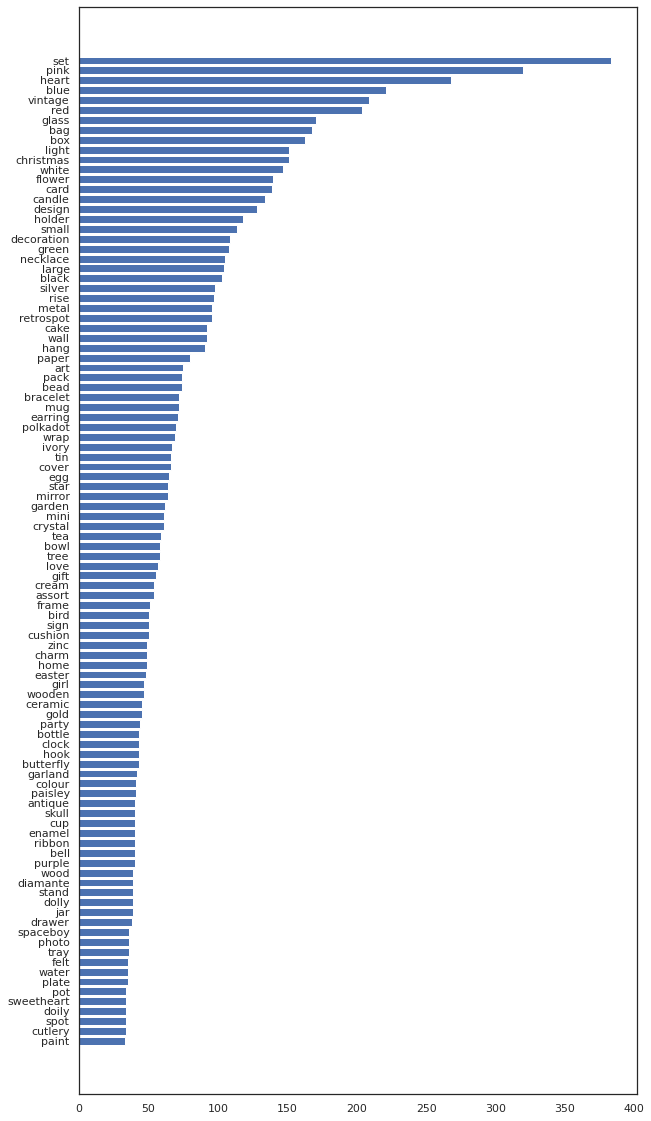

In [17]:
## Plotting most frequent words from positive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in df2['Descsription_processed']])  # all the rows are joined into a single paragraph
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 100 words by frequency
words_df = words_df.nlargest(columns="count", n = 100) 

words_df.sort_values('count', inplace = True)


# Plotting 100 frequent words
plt.figure(figsize=(10,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

### Word Cloud:

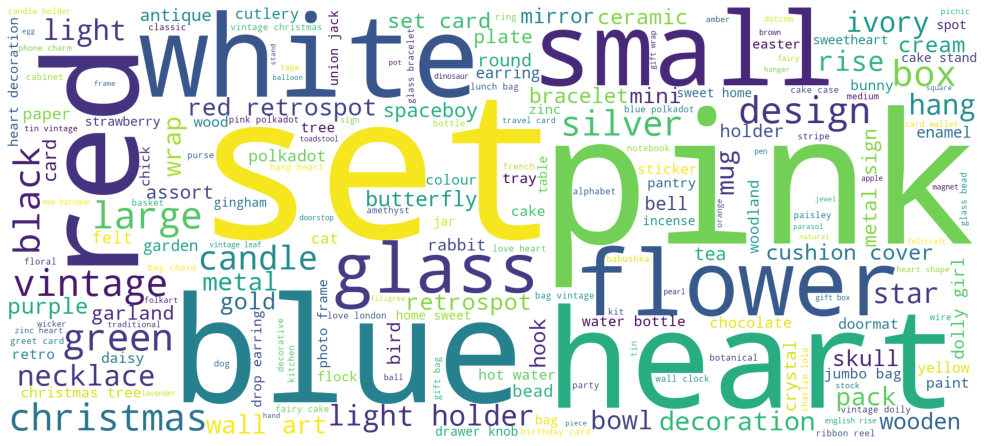

In [145]:
## Building a Word Cloud

from wordcloud import WordCloud

all_words = ' '.join([text for text in df2['Descsription_processed']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (15,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model:

* TF-IDF:

In [19]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 500 tokens
tfidf = TfidfVectorizer()    # by default: 1-gram approach
# tfidf = TfidfVectorizer(ngram_range = (2,3) ,max_features=2500) 

X = tfidf.fit_transform(df2.Descsription_processed).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = tfidf.get_feature_names()
nlp1 = pd.DataFrame(X, columns = feature_names)
nlp1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* FREQUENCY APPROACH:

In [21]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2['Descsription_processed']) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
nlp2 = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
nlp2

,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = bag_of_words.toarray()
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

* BINARY APPROACH:

In [24]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = True) 

# Step 3. Create the Bag-of-Words Model
bag_of_words_binary = count_vectorizer.fit_transform(df2['Descsription_processed']) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
nlp3 = pd.DataFrame(bag_of_words_binary.toarray(), columns = feature_names)
nlp3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
z = bag_of_words_binary.toarray()
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### k-means:

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

### Elbow plot

* TF-IDF:

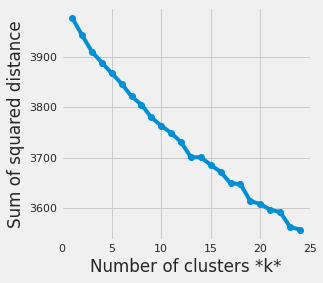

In [27]:
# Elbow plot
# We make a plot between k value and inertia

list_k = list(range(1, 25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

* FREQUENCY APPROACH:

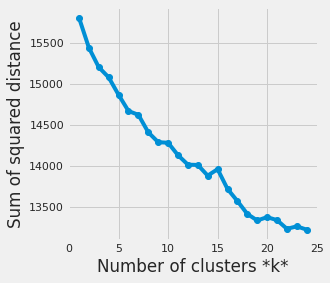

In [28]:
# Elbow plot
# We make a plot between k value and inertia

list_k = list(range(1, 25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(y)
    inertias.append(km.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

* BINARY APPROACH:

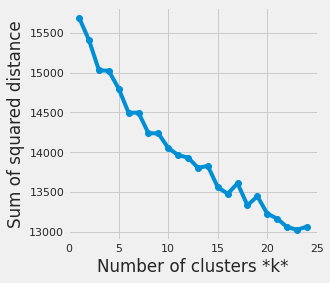

In [29]:
# Elbow plot
# We make a plot between k value and inertia

list_k = list(range(1, 25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(z)
    inertias.append(km.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

### PRINCIPAL COMPONENT ANALYSIS:
* We use PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot.
* Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
* HOW DO YOU DO A PCA?
  * Standardize the range of continuous initial variables
  * Compute the covariance matrix to identify correlations
  * Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
  * Create a feature vector to decide which principal components to keep
  * Recast the data along the principal components axes

In [48]:
# performing standardization on frequency approach
sc = StandardScaler()
X_scaled = sc.fit_transform(y)

In [49]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [50]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[2.67008208e-01 2.43720326e-01 2.10862847e-01 ... 8.97656100e-35
 3.14839950e-35 5.68219431e-36]



In [51]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[  0.26700821   0.51072853   0.72159138 ... 100.         100.
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

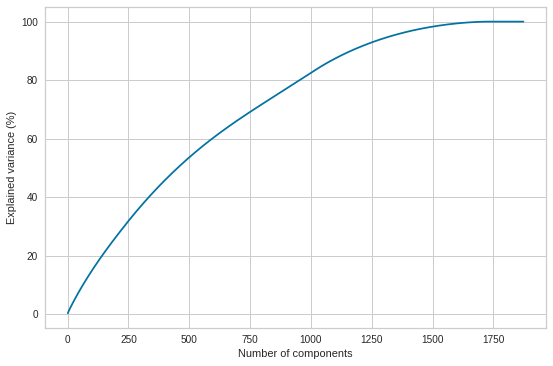

In [52]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Number of components: 953


Text(0, 0.5, 'Explained variance (%)')

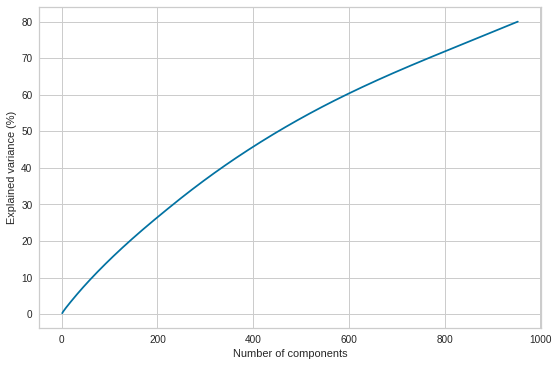

In [53]:
# finding the optimum no:of components
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.80)
pca.fit(X_scaled)

# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

### applying PCA:

In [123]:
from sklearn.decomposition import PCA

pca = PCA(50) 
 
#Transform the data
PCA_Data = pca.fit_transform(y)  # frequency approach

PCA_Data.shape

(4021, 50)

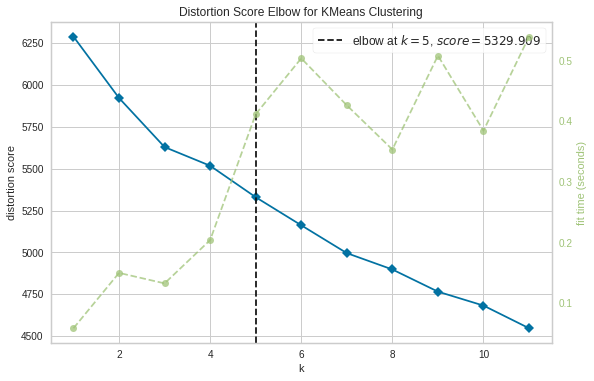

In [124]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(PCA_Data)
visualizer.show()

INTERPRETATION:
  * K=5 is the best value. 
  * ie: optimum number of clusters is 5.

### Exploratory Data Analysis:

In [125]:
km = KMeans(n_clusters=5) # applying k = 5

# fit + predict the labels of clusters.
label = km.fit_predict(PCA_Data)  
 
print(label)

[3 1 3 ... 1 3 1]


*  kmeans.fit_predict method returns the array of cluster labels each data point belongs to.

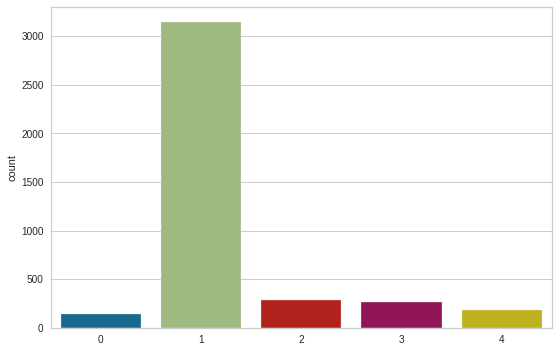

In [126]:
# countplot to check the number of clusters and number of products in each cluster

import seaborn as sns
sns.countplot(label)

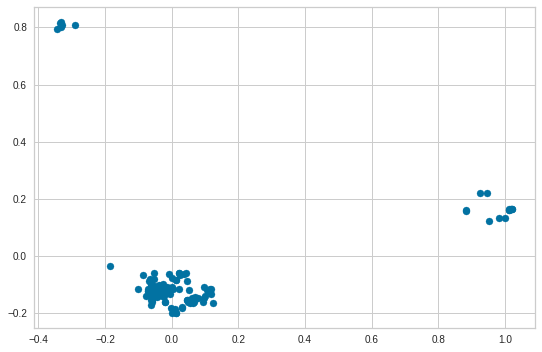

In [127]:
#filter rows of original data
filtered_label0 = PCA_Data[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

* The code above first filters and keeps the data points that belong to cluster label 0 and then creates a scatter plot.



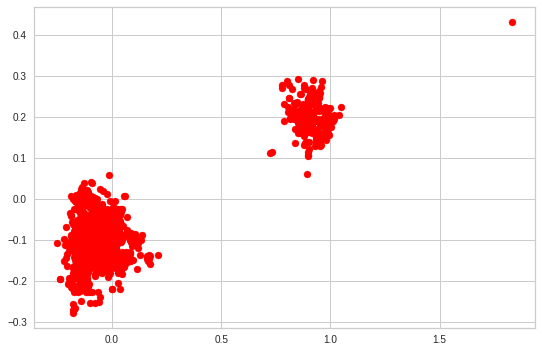

In [128]:
#filter rows of original data
filtered_label1 = PCA_Data[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], color = 'red')
plt.show()

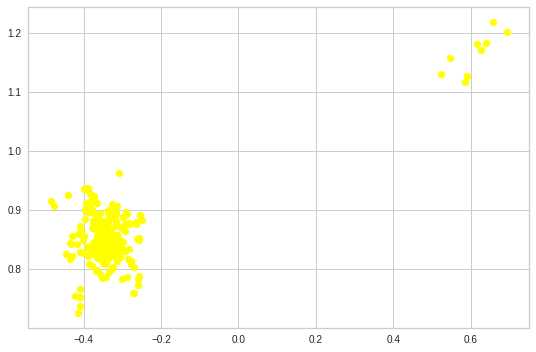

In [129]:
#filter rows of original data
filtered_label2 = PCA_Data[label == 2]
 
#plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1],color = 'yellow')
plt.show()

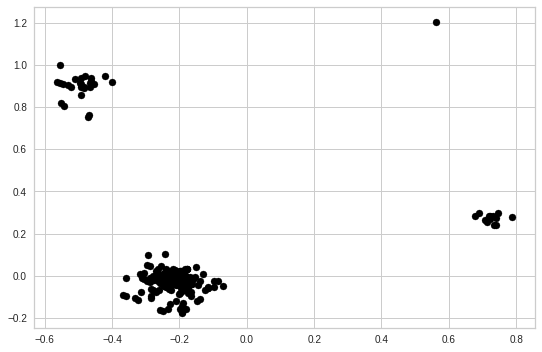

In [130]:
#filter rows of original data
filtered_label3 = PCA_Data[label == 3]
 
#plotting the results
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1], color = 'black')
plt.show()

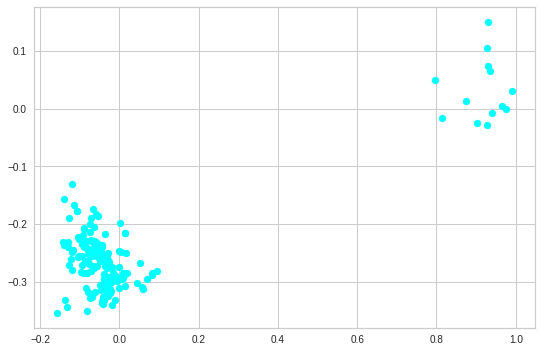

In [131]:
#filter rows of original data
filtered_label4 = PCA_Data[label == 4]
 
#plotting the results
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1], color = 'cyan')
plt.show()

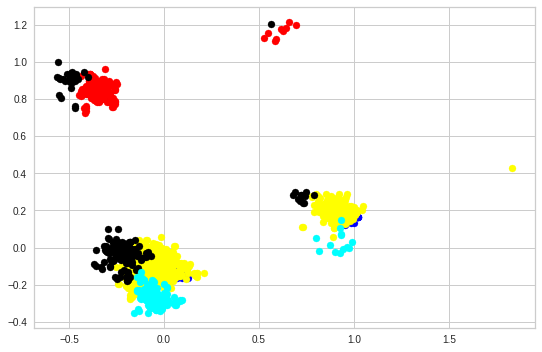

In [132]:
#filter rows of original data
filtered_label0 = PCA_Data[label == 0]
filtered_label1 = PCA_Data[label == 1]
filtered_label2 = PCA_Data[label == 2]
filtered_label3 = PCA_Data[label == 3]
filtered_label4 = PCA_Data[label == 4]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'yellow')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'black')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'cyan')
plt.show()

### Modelling:

In [133]:
# modelling
km = KMeans(n_clusters=5) # applying k = 5
km.fit(PCA_Data) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points

print("centroids:\n",centroids)
print("\n inertia: ",km.inertia_) # measures how tight my groups are. lower the better

centroids:
 [[-2.20273440e-01  7.35983844e-02  8.55577587e-01  2.14195516e-01
  -2.34809009e-01 -1.59278085e-01  3.15941326e-02  1.15723278e-01
   5.34736017e-02 -9.44019456e-03 -1.20756470e-02 -1.65990931e-02
   5.00495735e-02  1.42651138e-02  1.44439709e-02 -1.03409346e-02
  -3.88412837e-03 -3.12097893e-02 -2.24138078e-02  2.15119908e-02
  -1.31439129e-02 -2.93676921e-02  2.15816649e-03  2.16754199e-03
   1.99323716e-02 -2.12181425e-02 -3.66599980e-02  1.74797564e-02
  -1.66834468e-02  1.16913603e-02  1.83304737e-03 -1.28719856e-02
  -1.15859124e-03  7.55312327e-04 -1.25753023e-02  8.60553664e-03
   8.92184435e-03  3.88358781e-03  5.92478421e-03 -2.21801193e-03
  -1.26069827e-03  8.42771578e-03 -4.12960763e-03  1.26015862e-03
  -5.66128598e-03  5.49821153e-03 -1.52146259e-03  6.59881954e-04
  -1.35682878e-02  9.10010251e-04]
 [-9.38675054e-02 -2.25024209e-02  7.81166093e-02 -9.47601972e-02
   4.13671603e-01 -1.71996223e-02  2.11837564e-01 -4.15201739e-02
  -6.82614249e-02 -2.35699216

In [134]:
km.labels_   # shows which group each datapoint belongs to

array([0, 3, 0, ..., 3, 0, 3], dtype=int32)

### Silhouette score:
* Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters

In [135]:
# calculate a 'silhouette score'
from sklearn import metrics
score = metrics.silhouette_score(PCA_Data, km.labels_ )
score

0.1579819257427487

### Plotting all K-MEANS CLUSTERS along with Centroids:

* The below code iterates filtering the data according to each unique class one iteration at a time. The result we get is the final visualization of all the clusters.

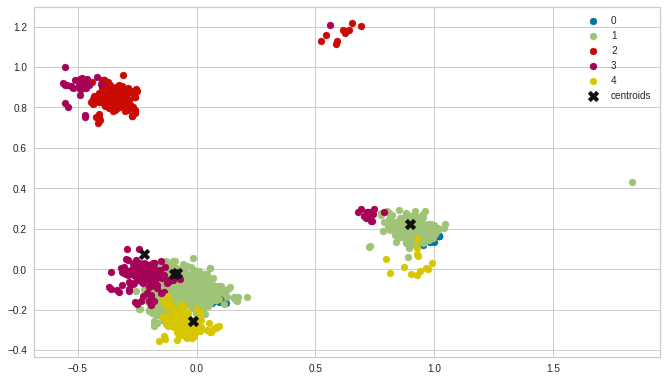

In [136]:
# Getting the Centroids
# Getting unique labels

centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(PCA_Data[label == i , 0] , PCA_Data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

### 3d plot:

In [115]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

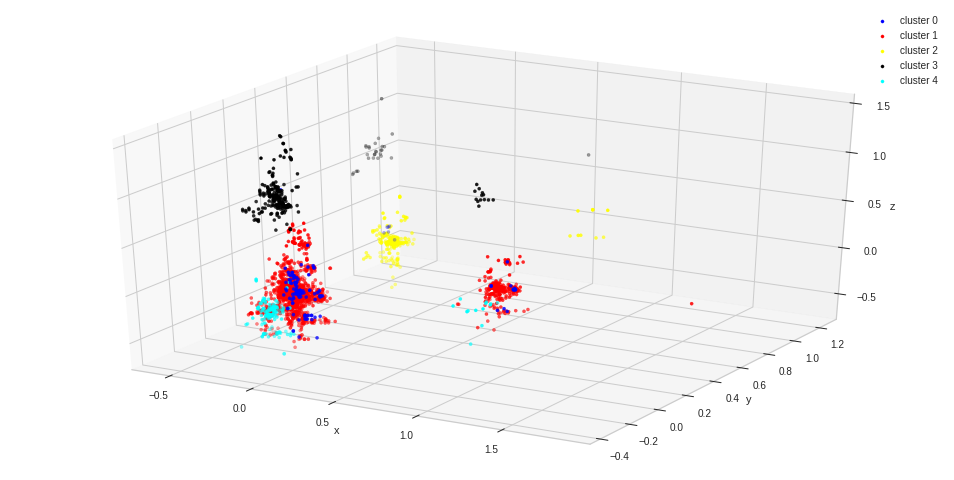

In [137]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(PCA_Data[label == 0,0],PCA_Data[label == 0,1],PCA_Data[label == 0,2], s = 10 , color = 'blue', label = "cluster 0")  
ax.scatter(PCA_Data[label == 1,0],PCA_Data[label == 1,1],PCA_Data[label == 1,2], s = 10 , color = 'red', label = "cluster 1")  
ax.scatter(PCA_Data[label == 2,0],PCA_Data[label == 2,1],PCA_Data[label == 2,2], s = 10 , color = 'yellow', label = "cluster 2")  
ax.scatter(PCA_Data[label == 3,0],PCA_Data[label == 3,1],PCA_Data[label == 3,2], s = 10 , color = 'black', label = "cluster 3") 
ax.scatter(PCA_Data[label == 4,0],PCA_Data[label == 4,1],PCA_Data[label == 4,2], s = 10 , color = 'cyan', label = "cluster 4") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

### merging the product clusters labels with the actual dataframe

In [138]:
df5 = pd.DataFrame(km.labels_)
print(df5.shape)
df5

(4021, 1)


,0
0,0
1,3
2,0
3,3
4,0
...,...
4016,3
4017,3
4018,3
4019,0


In [139]:
print(df2.shape)
df2

(4021, 1)


,Descsription_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4016,wet
4017,wet box
4018,mixed
4019,cream hang heart light holder


In [140]:
df2 = df2.reset_index(drop=True)

In [141]:
df6 = df2.join(df5)
print(df6.shape)
df6

(4021, 2)


,Descsription_processed,0
0,white hang heart light holder,0
1,white metal lantern,3
2,cream cupid heart coat hanger,0
3,knit union flag hot water bottle,3
4,red woolly hottie white heart,0
...,...,...
4016,wet,3
4017,wet box,3
4018,mixed,3
4019,cream hang heart light holder,0


In [142]:
df6.rename(columns={0:'Product Cluster'},inplace=True)
df6.head(3)

,Descsription_processed,Product Cluster
0,white hang heart light holder,0
1,white metal lantern,3
2,cream cupid heart coat hanger,0


In [143]:
df8 = pd.merge(df, df6, how='left', on='Descsription_processed')
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Descsription_processed,Product Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,3
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.1,12680.0,France,child apron dolly girl,3
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,3
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,3
